**IMPORTING Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info() #as we see we have no null values in are data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


***Correlation coefficient of variables***

In [5]:
df.corr()  #as we see variables are highly correlated to each other

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Checking ouliers and visulization**

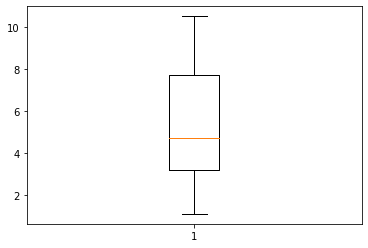

In [6]:
plt.boxplot(df["YearsExperience"])
plt.show()             #There is no outlires

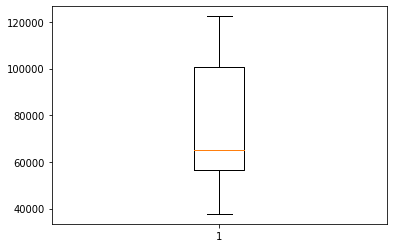

In [7]:
plt.boxplot(df["Salary"])
plt.show()                 #There is no outlires

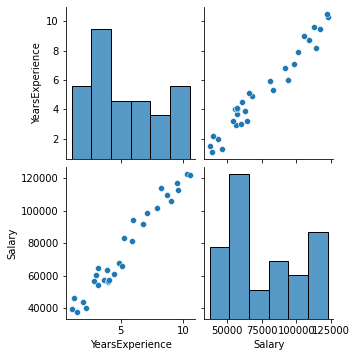

In [8]:
sns.pairplot(df)
plt.show()                 #graph is showing excellent relation

**Creating model**

In [9]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=df).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


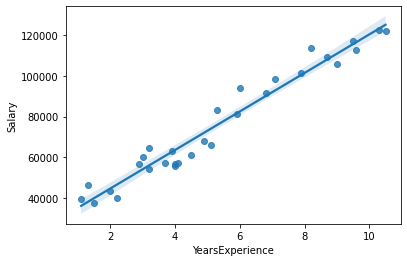

In [10]:
sns.regplot(x="YearsExperience", y="Salary", data=df)

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.pvalues   #As we see p value is less than 0.05 we can say value is significant

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [13]:
print("r^2 :",model.rsquared) #Accurancy of model is Excellent which is 95%

r^2 : 0.9569566641435086


In [14]:
salary_pre=model.predict(df["YearsExperience"])


In [15]:
df["salary_pre"]=salary_pre
df

,YearsExperience,Salary,salary_pre
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


**Predicting Salary basis of Experiance**

In [16]:
#x=int(input("Experiance :"))
#print("Salary :", 25792.2001994+9449.962321*x,"Rs")